# Begining

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [3]:
dir = '/content/drive/MyDrive/BI-druggable-protein-prediction/Data/'
processed_data_dir = 'processed_data'

def read_file(feature):
  predictor = feature
  paac_train = pd.read_csv(f'{dir+processed_data_dir}/TR_{feature}.csv')
  paac_test = pd.read_csv(f'{dir+processed_data_dir}/TS_{feature}.csv')
  return predictor, paac_train, paac_test

In [4]:
predictor, paac_train, paac_test = read_file('CTD')
paac_train.head()

,_PolarizabilityC1,_PolarizabilityC2,_PolarizabilityC3,_SolventAccessibilityC1,_SolventAccessibilityC2,_SolventAccessibilityC3,_SecondaryStrC1,_SecondaryStrC2,_SecondaryStrC3,_ChargeC1,...,_HydrophobicityD2050,_HydrophobicityD2075,_HydrophobicityD2100,_HydrophobicityD3001,_HydrophobicityD3025,_HydrophobicityD3050,_HydrophobicityD3075,_HydrophobicityD3100,id,label
0,0.311,0.438,0.251,0.440,0.329,0.231,0.435,0.291,0.274,0.110,...,49.771,73.602,99.908,0.092,25.940,51.237,77.085,99.817,Positive_798,1
1,0.326,0.461,0.214,0.438,0.303,0.260,0.467,0.266,0.267,0.107,...,57.125,79.771,99.491,0.127,21.374,45.038,65.267,100.000,Negative_170,0
2,0.254,0.449,0.297,0.390,0.407,0.203,0.559,0.178,0.263,0.203,...,42.373,77.966,100.000,0.847,23.729,46.610,72.881,99.153,Negative_203,0
3,0.303,0.402,0.295,0.410,0.303,0.287,0.434,0.238,0.328,0.139,...,54.918,72.951,99.180,0.820,19.672,42.623,68.852,100.000,Negative_318,0
4,0.381,0.435,0.185,0.435,0.149,0.417,0.315,0.274,0.411,0.030,...,47.024,70.238,98.810,0.595,34.524,52.976,82.738,100.000,Negative_336,0


In [5]:
paac_train

,_PolarizabilityC1,_PolarizabilityC2,_PolarizabilityC3,_SolventAccessibilityC1,_SolventAccessibilityC2,_SolventAccessibilityC3,_SecondaryStrC1,_SecondaryStrC2,_SecondaryStrC3,_ChargeC1,...,_HydrophobicityD2050,_HydrophobicityD2075,_HydrophobicityD2100,_HydrophobicityD3001,_HydrophobicityD3025,_HydrophobicityD3050,_HydrophobicityD3075,_HydrophobicityD3100,id,label
0,0.311,0.438,0.251,0.440,0.329,0.231,0.435,0.291,0.274,0.110,...,49.771,73.602,99.908,0.092,25.940,51.237,77.085,99.817,Positive_798,1
1,0.326,0.461,0.214,0.438,0.303,0.260,0.467,0.266,0.267,0.107,...,57.125,79.771,99.491,0.127,21.374,45.038,65.267,100.000,Negative_170,0
2,0.254,0.449,0.297,0.390,0.407,0.203,0.559,0.178,0.263,0.203,...,42.373,77.966,100.000,0.847,23.729,46.610,72.881,99.153,Negative_203,0
3,0.303,0.402,0.295,0.410,0.303,0.287,0.434,0.238,0.328,0.139,...,54.918,72.951,99.180,0.820,19.672,42.623,68.852,100.000,Negative_318,0
4,0.381,0.435,0.185,0.435,0.149,0.417,0.315,0.274,0.411,0.030,...,47.024,70.238,98.810,0.595,34.524,52.976,82.738,100.000,Negative_336,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2537,0.390,0.405,0.205,0.654,0.132,0.215,0.322,0.395,0.283,0.049,...,50.244,69.756,99.512,0.488,19.512,46.829,75.122,99.024,Negative_1011,0
2538,0.338,0.384,0.278,0.372,0.391,0.237,0.463,0.266,0.272,0.144,...,55.312,77.812,98.438,0.312,24.062,40.312,55.625,95.000,Negative_1046,0
2539,0.401,0.418,0.181,0.348,0.272,0.380,0.373,0.206,0.422,0.094,...,51.220,78.746,99.652,0.348,27.875,49.477,72.474,98.955,Negative_213,0
2540,0.300,0.369,0.331,0.408,0.400,0.192,0.531,0.238,0.231,0.223,...,53.077,66.154,98.462,0.769,26.923,44.615,66.923,97.692,Positive_1042,1


In [6]:
paac_test

,_PolarizabilityC1,_PolarizabilityC2,_PolarizabilityC3,_SolventAccessibilityC1,_SolventAccessibilityC2,_SolventAccessibilityC3,_SecondaryStrC1,_SecondaryStrC2,_SecondaryStrC3,_ChargeC1,...,_HydrophobicityD2050,_HydrophobicityD2075,_HydrophobicityD2100,_HydrophobicityD3001,_HydrophobicityD3025,_HydrophobicityD3050,_HydrophobicityD3075,_HydrophobicityD3100,id,label
0,0.246,0.437,0.317,0.235,0.404,0.361,0.475,0.158,0.366,0.246,...,55.191,79.235,98.361,0.546,14.754,25.683,35.519,100.000,Negative_130,0
1,0.336,0.398,0.266,0.450,0.274,0.276,0.433,0.321,0.246,0.095,...,51.741,77.861,100.000,0.249,23.632,49.005,71.891,99.502,Positive_149,1
2,0.278,0.471,0.251,0.457,0.278,0.265,0.381,0.327,0.291,0.094,...,49.327,72.197,98.206,0.448,18.834,49.776,77.578,100.000,Positive_43,1
3,0.319,0.404,0.277,0.416,0.367,0.217,0.470,0.277,0.253,0.175,...,53.614,74.096,99.398,0.602,22.289,43.373,69.880,100.000,Positive_202,1
4,0.357,0.404,0.238,0.368,0.332,0.300,0.436,0.229,0.335,0.123,...,46.988,74.833,99.732,0.134,32.396,53.949,78.447,100.000,Negative_144,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,0.347,0.510,0.143,0.486,0.282,0.232,0.486,0.178,0.336,0.077,...,51.737,74.903,98.842,0.386,21.236,45.174,67.568,100.000,Negative_28,0
457,0.278,0.450,0.272,0.482,0.178,0.340,0.379,0.392,0.230,0.078,...,49.515,77.023,100.000,0.324,22.330,47.896,69.579,98.706,Negative_161,0
458,0.387,0.426,0.186,0.461,0.279,0.260,0.451,0.191,0.358,0.118,...,50.000,75.000,100.000,0.490,20.098,42.647,65.196,98.529,Negative_55,0
459,0.310,0.492,0.198,0.497,0.208,0.294,0.442,0.289,0.269,0.071,...,53.807,80.203,99.492,0.508,21.320,36.041,63.959,100.000,Negative_134,0


In [7]:
paac_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Columns: 149 entries, _PolarizabilityC1 to label
dtypes: float64(147), int64(1), object(1)
memory usage: 2.9+ MB


In [8]:
paac_train['id']

0        Positive_798
1        Negative_170
2        Negative_203
3        Negative_318
4        Negative_336
            ...      
2537    Negative_1011
2538    Negative_1046
2539     Negative_213
2540    Positive_1042
2541     Positive_742
Name: id, Length: 2542, dtype: object

<Axes: >

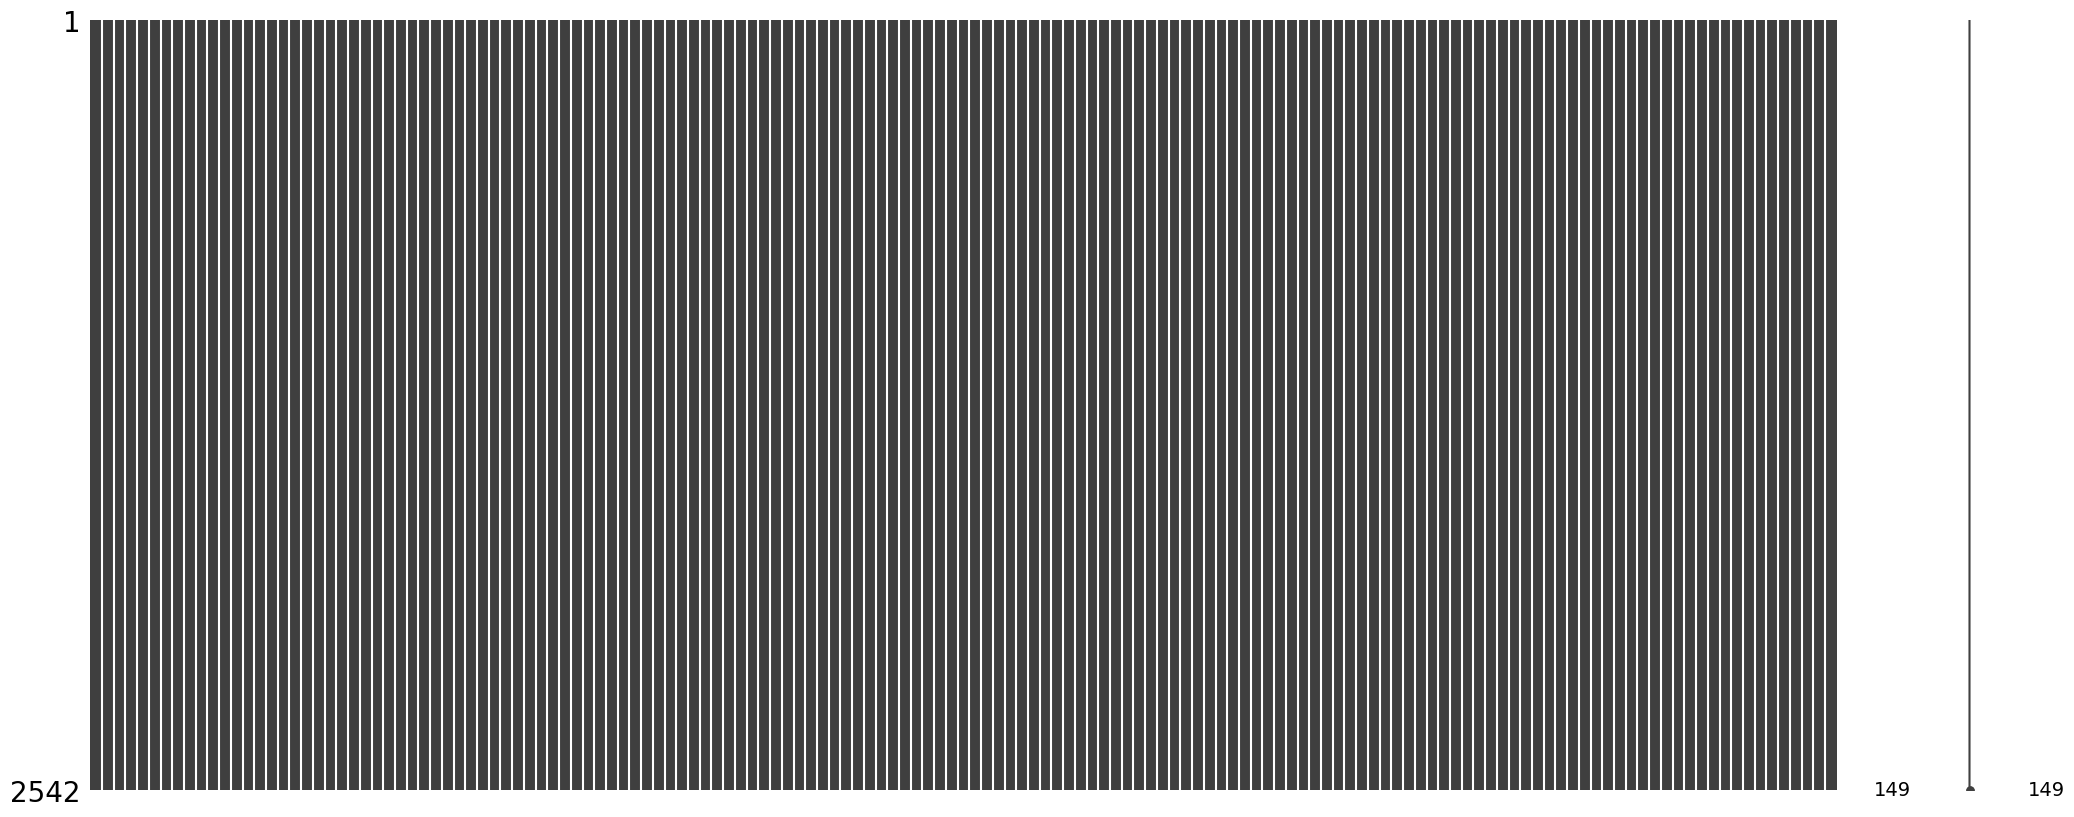

In [9]:
msno.matrix(paac_train)

In [10]:
# correlation matrix
def correlation_hm(df):
    correlation_matrix = df.corr()
    
    variables = correlation_matrix.columns
    important_variables = []
    for row in variables:
        corrl = correlation_matrix.loc[row, 'label']
        important_variables.append(row)

    hp = correlation_matrix.loc[important_variables, important_variables]
    plt.figure("Heatmap-Important Variables", figsize=(24,14))
    sns.heatmap(hp, annot=True, cbar=True)

In [ ]:
correlation_hm(paac_train)

In [ ]:
# Need to balance the target variable. Oversampling is used
def balance(df):
  conditions = [
      (df['label'] == 0),
      (df['label'] == 1)
  ]

  values = [0 , 1]

  outcomes = np.select(conditions, values)

  rov = RandomOverSampler(random_state = 3)
  df_bal, out_bal = rov.fit_resample(df, outcomes)
  return df_bal

In [ ]:
paac_train_bal = balance(paac_train)

In [ ]:
paac_train_bal

,_PolarizabilityC1,_PolarizabilityC2,_PolarizabilityC3,_SolventAccessibilityC1,_SolventAccessibilityC2,_SolventAccessibilityC3,_SecondaryStrC1,_SecondaryStrC2,_SecondaryStrC3,_ChargeC1,...,_HydrophobicityD2050,_HydrophobicityD2075,_HydrophobicityD2100,_HydrophobicityD3001,_HydrophobicityD3025,_HydrophobicityD3050,_HydrophobicityD3075,_HydrophobicityD3100,id,label
0,0.311,0.438,0.251,0.440,0.329,0.231,0.435,0.291,0.274,0.110,...,49.771,73.602,99.908,0.092,25.940,51.237,77.085,99.817,Positive_798,1
1,0.326,0.461,0.214,0.438,0.303,0.260,0.467,0.266,0.267,0.107,...,57.125,79.771,99.491,0.127,21.374,45.038,65.267,100.000,Negative_170,0
2,0.254,0.449,0.297,0.390,0.407,0.203,0.559,0.178,0.263,0.203,...,42.373,77.966,100.000,0.847,23.729,46.610,72.881,99.153,Negative_203,0
3,0.303,0.402,0.295,0.410,0.303,0.287,0.434,0.238,0.328,0.139,...,54.918,72.951,99.180,0.820,19.672,42.623,68.852,100.000,Negative_318,0
4,0.381,0.435,0.185,0.435,0.149,0.417,0.315,0.274,0.411,0.030,...,47.024,70.238,98.810,0.595,34.524,52.976,82.738,100.000,Negative_336,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2633,0.310,0.438,0.252,0.453,0.312,0.234,0.434,0.275,0.291,0.113,...,53.145,77.440,100.000,0.217,22.560,49.458,73.536,99.566,Positive_71,1
2634,0.299,0.488,0.213,0.563,0.202,0.236,0.370,0.363,0.267,0.064,...,47.664,70.093,100.000,0.187,28.224,51.589,74.393,98.879,Positive_424,1
2635,0.371,0.397,0.232,0.368,0.325,0.307,0.443,0.204,0.353,0.130,...,52.190,77.981,99.696,0.061,30.292,49.818,70.681,99.878,Positive_818,1
2636,0.311,0.478,0.211,0.453,0.335,0.211,0.466,0.280,0.255,0.093,...,44.720,76.398,100.000,0.621,24.224,48.447,70.807,97.516,Positive_737,1


In [ ]:
# Check data balance

def plot_balance(df, title='Title'):
  label_counts = df['label'].value_counts().sort_index()
  x = label_counts.index.tolist()
  y = label_counts.tolist()

  plt.bar(x, y)
  plt.xlim(-2, 2)
  plt.xticks(x)
  plt.title(title)
  plt.xlabel('Label')
  plt.ylabel('Occurrence')
  plt.show()

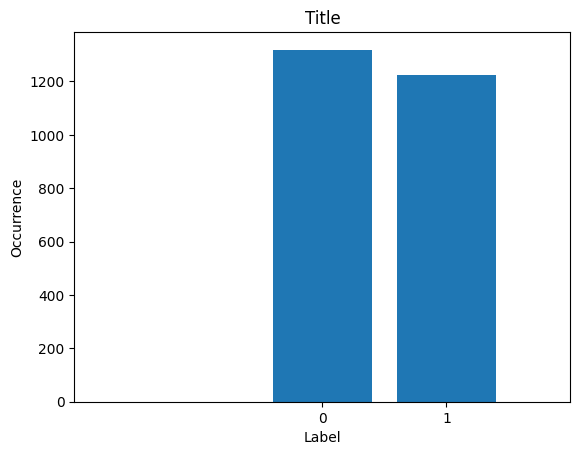

In [ ]:
plot_balance(paac_train)

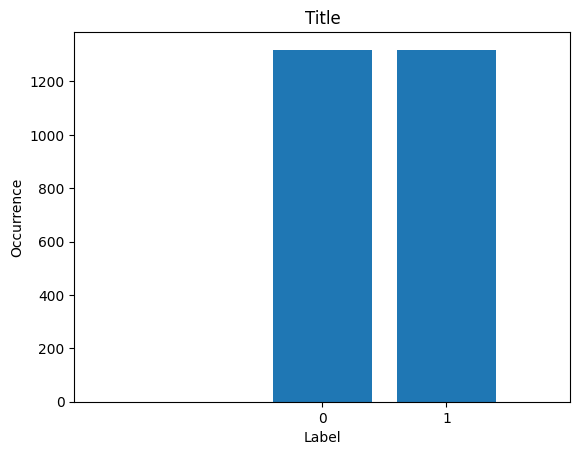

In [ ]:
plot_balance(paac_train_bal)

## Feature importance 

In [ ]:
X = paac_train.drop(['id', 'label'], axis=1, inplace=False)
Y = paac_train['label']

In [ ]:
Y

0       1
1       0
2       0
3       0
4       0
       ..
2537    0
2538    0
2539    0
2540    1
2541    1
Name: label, Length: 2542, dtype: int64

In [ ]:
def feature_importance(X,Y):
  #Train a random forest regressor on the entire dataset
  rf = RandomForestClassifier(n_estimators=100, random_state=42)
  rf.fit(X, Y)

  # Get the feature importances from the trained random forest
  importances = rf.feature_importances_

  # Rank the features by importance and print the top 10
  sorted_idx = importances.argsort()[::-1]
  for i in range(10):
      print(f"{i+1}. Feature '{X.columns[sorted_idx[i]]}' has importance {importances[sorted_idx[i]]:.3f}")

  # # Select the top k features based on importance
  k = int((70/100)*len(sorted_idx))
  top_k_idx = sorted_idx[:k]
  X_top_k = X.iloc[:, top_k_idx]

  # Plot the importance
  sorted_importances = importances[sorted_idx]
  sorted_features = X.columns[sorted_idx]

  # Plot the feature importances as a bar plot
  plt.bar(range(X.shape[1]), sorted_importances)
  plt.xticks(range(X.shape[1]), sorted_features, rotation=90)
  plt.title("Feature Importances")
  plt.show()

  return X_top_k

In [ ]:
X_top_k = feature_importance(X,Y)

In [ ]:
X_top_k.info()

In [ ]:
paac_train

In [ ]:
preprocessed = pd.concat([paac_train['label'], X_top_k], axis=1)
preprocessed = pd.concat([paac_train['id'], preprocessed], axis=1)

In [ ]:
preprocessed

In [ ]:
# preprocessed.to_csv(f'/content/drive/MyDrive/BI-druggable-protein-prediction/Data/selected_data/preprocessed_{predictor}.csv', index=False)

# **Model Training**

In [ ]:
df = pd.read_csv(f'/content/drive/MyDrive/BI-druggable-protein-prediction/Data/selected_data/preprocessed_{predictor}.csv')

In [ ]:
df

In [ ]:
X = df.drop(['id', 'label'], axis=1, inplace=False)
Y = df['label']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# split the training data into train and validation

# Split the data
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.2)

In [ ]:
important_cols = X.columns
# Scaling
scaler = StandardScaler()
normal = ColumnTransformer([('normalize', scaler, important_cols)], remainder = 'passthrough')

In [ ]:
X_train = pd.DataFrame(normal.fit_transform(X_train), columns = important_cols)
X_val = pd.DataFrame(normal.transform(X_val), columns = important_cols)

In [ ]:
# save the scaler
# save the normal object to a file for use in inferencing
# joblib.dump(normal, f'/content/drive/MyDrive/BI-druggable-protein-prediction/Dumps/normal_{predictor}.joblib')

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

class BinaryClassifier:
    def __init__(self, models):
        self.models = models
        self.best_model = None

    def train(self, X_train, y_train):
        for model_name, model in self.models.items():
            print(f"Training {model_name}...")
            model['model'].fit(X_train, y_train)
            print(f"{model_name} training completed.")

    def evaluate(self, X_test, y_test):
        for model_name, model in self.models.items():
            print(f"Evaluating {model_name}...")
            y_pred = model['model'].predict(X_test)
            report = classification_report(y_test, y_pred)
            print(f"Classification Report for {model_name}:")
            print(report)

    def grid_search(self, X_train, y_train, param_grid, cv=5):
        for model_name, model in self.models.items():
            print(f"Performing Grid Search for {model_name}...")
            grid_search = GridSearchCV(model['model'], param_grid[model_name], cv=cv, scoring='f1')
            grid_search.fit(X_train, y_train)
            best_params = grid_search.best_params_
            best_score = grid_search.best_score_
            print(f"Best parameters for {model_name}: {best_params}")
            print(f"Best score for {model_name}: {best_score}")
            self.models[model_name]['best_param'] = best_params
            self.models[model_name]['best_score'] = best_score
            self.models[model_name]['model'] = grid_search.best_estimator_
            if self.best_model is None or grid_search.best_score_ > self.best_model['score']:
                self.best_model = {'model_name': model_name, 'model': grid_search.best_estimator_, 'score': grid_search.best_score_, 'params': best_params}

    def get_best_model(self):
        return self.best_model


    def plot_confusion_matrix(self, X_test, y_test):
        for model_name, model in self.models.items():
            y_pred = model['model'].predict(X_test)
            cm = confusion_matrix(y_test, y_pred)
            plt.figure(figsize=(6, 4))
            sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
            plt.title(f'Confusion Matrix - {model_name}')
            plt.xlabel('Predicted')
            plt.ylabel('Actual')
            plt.show()

    def compare_models(self, X_test, y_test):
        models = list(self.models.keys())
        metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
        scores = np.zeros((len(models), len(metrics)))

        for i, (model_name, model) in enumerate(self.models.items()):
            y_pred = model['model'].predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            scores[i] = [accuracy, precision, recall, f1]

        sns.set(style='whitegrid')
        plt.figure(figsize=(12, 6))
        colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
        bar_width = 0.15
        index = np.arange(len(models))

        for i, metric in enumerate(metrics):
            plt.bar(index + i * bar_width, scores[:, i], bar_width, color=colors[i], label=metric)

        plt.xlabel('Models')
        plt.ylabel('Score')
        plt.title(f'Model Comparison - {predictor}')
        plt.xticks(index + bar_width * (len(metrics) - 1) / 2, models)
        plt.legend()

        # Add data labels
        label_offset = 0.02
        for i, v in enumerate(index):
            for j, metric in enumerate(metrics):
                plt.text(v + j * bar_width, scores[i, j] + label_offset, f'{scores[i, j]:.3f}', ha='center', color='black', fontsize=8)

        plt.tight_layout()
        plt.show()



In [ ]:
!pip install catboost

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from catboost import CatBoostClassifier

models = {
    'SVM': {
        'model': SVC(),
        'best_param': None,
        'best_score': None
        },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'best_param': None,
        'best_score': None
        },
    'Logistic Regression': {
        'model': LogisticRegression(),
        'best_param': None,
        'best_score': None
        },
    'XGBoost': {
        'model': xgb.XGBClassifier(),
        'best_param': None,
        'best_score': None
        },
    'CatBoost': {
        'model': CatBoostClassifier(),
        'best_param': None,
        'best_score': None
        }
}

param_grid = {
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'Random Forest': {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10]},
    'Logistic Regression': {'C': [0.1, 1, 10], 'solver': ['liblinear']},
    'XGBoost': {'n_estimators': [100, 200, 300], 'max_depth': [3, 5, 7]},
    'CatBoost': {'iterations': [100, 200, 300], 'depth': [3, 5, 7]}
}


In [ ]:
classifier = BinaryClassifier(models)


In [ ]:
classifier.train(X_train, Y_train)


In [ ]:
classifier.evaluate(X_val, Y_val)

In [ ]:
classifier.plot_confusion_matrix(X_val, Y_val)

In [ ]:
classifier.compare_models(X_val, Y_val)

In [ ]:
classifier.grid_search(X_train, Y_train, param_grid)

In [ ]:

best_model = classifier.get_best_model()
print("Best Model:", best_model['model_name'])

In [ ]:
classifier.models

In [ ]:
models

## Model  Saving

In [ ]:
# save the best model

from sklearn.pipeline import Pipeline
pipe = Pipeline([('scaler', normal), ('model', best_model['model'])])

pipe.fit(X_train, Y_train)

# joblib.dump(pipe, f"/content/drive/MyDrive/BI-druggable-protein-prediction/Models/{predictor}.joblib")


# **Inferencing**

In [ ]:
# import the trained model

predictor_model = joblib.load(f"/content/drive/MyDrive/BI-druggable-protein-prediction/Models/{predictor}.joblib")

#import the scaler

normal = joblib.load(f'/content/drive/MyDrive/BI-druggable-protein-prediction/Dumps/normal_{predictor}.joblib')


In [ ]:
paac_test

In [ ]:
features = paac_test.drop(['id', 'label'], axis=1, inplace = False)

In [ ]:
scaled_features = pd.DataFrame(normal.transform(features), columns = important_cols)

In [ ]:
scaled_features

In [ ]:
predict_results = predictor_model.predict(scaled_features)

In [ ]:
predict_results

In [ ]:
report = classification_report(paac_test.label, predict_results)
print(report)

In [ ]:
def report(y_true, y_pred):
  # Calculate accuracy
  accuracy = accuracy_score(y_true, y_pred)

  # Calculate F1 score
  f1 = f1_score(y_true, y_pred)

  # Calculate sensitivity (recall)
  sensitivity = recall_score(y_true, y_pred)

  # Calculate specificity
  tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
  specificity = tn / (tn + fp)

  # Calculate precision
  precision = precision_score(y_true, y_pred)

  weights = {'Accuracy': 0.3, 'F1': 0.2, 'Sensitivity': 0.2, 'Specificity': 0.1, 'Precision': 0.2}

  data = {'Accuracy': [accuracy],
        'F1': [f1],
        'Sensitivity': [sensitivity],
        'Specificity': [specificity],
        'Precision': [precision]}
  df = pd.DataFrame(data)

   # Calculate the combined score
  combined_score = sum([weights[metric] * df[metric].values[0] for metric in weights])
  df['Combined Score'] = combined_score

  print(df)
  # df.to_csv(f'/content/drive/MyDrive/BI-druggable-protein-prediction/Predictions/{predictor}_classification_metrics.csv', index=False)


In [ ]:
report(paac_test.label, predict_results)

## Save Predicted Result

In [ ]:
results = pd.DataFrame({'predicted_values': predict_results})

In [ ]:
results = pd.concat([paac_test['id'], results], axis=1)

In [ ]:
results

In [ ]:
# results.to_csv(f'/content/drive/MyDrive/BI-druggable-protein-prediction/Predictions/{predictor}_predictions.csv', index=False)

## Output txt

In [ ]:
results['Numeric'] = results['id'].str.split('_').str[1].astype(int)

predictions_neg = results[results['id'].str.startswith('N')]
# Sort the DataFrame based on the 'Numeric' column in ascending order
predictions_neg = predictions_neg.sort_values('Numeric')

# Remove the 'Numeric' column from the sorted DataFrame
predictions_neg = predictions_neg.drop('Numeric', axis=1)

predictions_pos = results[results['id'].str.startswith('P')]
# Sort the DataFrame based on the 'Numeric' column in ascending order
predictions_pos = predictions_pos.sort_values('Numeric')

# Remove the 'Numeric' column from the sorted DataFrame
predictions_pos = predictions_pos.drop('Numeric', axis=1)

In [ ]:
# Save the DataFrame to a text file
# predictions_pos.to_csv(f'/content/drive/MyDrive/BI-druggable-protein-prediction/Predictions/{predictor}_predictions_pos.txt', index=False, header=True, sep='\t')
# predictions_neg.to_csv(f'/content/drive/MyDrive/BI-druggable-protein-prediction/Predictions/{predictor}_predictions_neg.txt', index=False, header=True, sep='\t')